#### Lab1：Regression

In [95]:
# enable intel acceleration; annotate this if you are not an Intel user or did not install the package
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [96]:
# import sklearn's metrics
from sklearn.metrics import mean_squared_error, r2_score
# define a function for adjusted r2_score
def adj_r2_score(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k)

from IPython.display import display
import pandas as pd
from sklearn.preprocessing import StandardScaler
def load_data(train_file, test_file, is_normalize=True):
    FILE_DIR = "./dataset/"
    # load the data
    train_file = pd.read_csv(FILE_DIR + train_file)
    test_file = pd.read_csv(FILE_DIR + test_file)
    # extract the house_price column for y
    train_y = train_file["house_value"]
    test_y = test_file["house_value"]
    # drop the house_price column for X
    train_file.drop("house_value", axis=1, inplace=True)
    test_file.drop("house_value", axis=1, inplace=True)
    # in any case, return it as numpy array
    train_X = train_file.to_numpy()
    test_X = test_file.to_numpy()
    train_y = train_y.to_numpy()
    test_y = test_y.to_numpy()
    if is_normalize:
        # normalize the data with sklearn scaler
        scaler = StandardScaler()
        train_file = scaler.fit_transform(train_X)
        test_file = scaler.transform(test_X)

    return train_X, train_y, test_X, test_y

X, y, test_X, test_y = load_data("train_set.csv", "test_set.csv", True)
# print the size of X, y, test_X, test_y
print("X shape: ", X.shape)
print("y shape: ", y.shape)
print("test_X shape: ", test_X.shape)
print("test_y shape: ", test_y.shape)
dataset_whole = pd.read_csv("./dataset/data_set.csv")
dataset_whole.describe()

X shape:  (15419, 12)
y shape:  (15419,)
test_X shape:  (3949, 12)
test_y shape:  (3949,)


,median_income,house_age,avg_rooms,avg_bedrooms,block_population,avg_occupancy,latitude,longitude,house_value,diag_coord,bed_per_rooms,rooms_per_occup,pop_per_occup
count,19368.000000,19368.000000,19368.000000,19368.000000,19368.000000,19368.000000,19368.000000,19368.000000,19368.000000,19368.000000,19368.000000,19368.000000,19368.000000
mean,3.673811,28.504337,5.231582,1.068762,1434.512443,2.947061,35.640001,-119.567480,1.924389,-83.927479,0.214865,1.882022,501.111266
std,1.551153,12.473440,1.324958,0.173759,1055.291048,0.975075,2.143433,2.003215,0.970605,0.798970,0.056603,0.621850,366.403133
min,0.499900,1.000000,0.846154,0.333333,5.000000,1.089286,32.540000,-124.350000,0.149990,-85.870000,0.100000,0.104410,2.000000
25%,2.529250,18.000000,4.408579,1.005401,805.000000,2.450000,33.930000,-121.770000,1.167000,-84.410000,0.177625,1.496966,284.000000
50%,3.451150,29.000000,5.170473,1.047675,1185.000000,2.840974,34.260000,-118.490000,1.741000,-84.170000,0.204537,1.907405,414.000000
75%,4.583300,37.000000,5.945098,1.096985,1749.000000,3.304772,37.720000,-118.000000,2.484000,-83.510000,0.240879,2.237978,607.000000
max,12.500000,52.000000,37.063492,8.207547,28566.000000,63.750000,41.950000,-114.550000,5.000000,-78.290000,1.000000,17.353982,6082.000000


In [97]:
def train_test(model_name, model, X, y, test_X, test_y):
    # train the model
    model.fit(X, y)
    # calculate train set metrics
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    adj_r2 = adj_r2_score(r2, X.shape[0], X.shape[1])
    # round the metrics to 4 decimal places
    mse = round(mse, 4)
    r2 = round(r2, 4)
    adj_r2 = round(adj_r2, 4)
    train_set_metrics = [mse, r2, adj_r2]
    # predict the model
    y_pred = model.predict(test_X)
    # calculate the metrics
    mse = mean_squared_error(test_y, y_pred)
    r2 = r2_score(test_y, y_pred)
    adj_r2 = adj_r2_score(r2, test_X.shape[0], test_X.shape[1])
        # round the metrics to 4 decimal places
    mse = round(mse, 4)
    r2 = round(r2, 4)
    adj_r2 = round(adj_r2, 4)
    test_set_metrics = [mse, r2, adj_r2]
    metrics = {
        "train_set": train_set_metrics,
        "test_set": test_set_metrics
    }
    return metrics

### Linear Models

- Linear regression
- Lasso regression (cross validation)
- Ridge regression (cross validation)

In [98]:
# import sklearn's linear models
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression, Lasso

LinearRegression_model = LinearRegression()
LinearRegression_metrics = train_test("LinearRegression", LinearRegression_model, X, y, test_X, test_y)
display("Linear Regression", LinearRegression_metrics)

#SGDRegression_model = SGDRegressor(penalty=None, random_state=42)
#SGDRegression_metrics = train_test("SGDRegression", SGDRegression_model, X, y, test_X, test_y)
#display("SGDRegression_metrics: ", SGDRegression_metrics)

Lasso_model = Lasso(random_state=42)
Lasso_metrics = train_test("Lasso", Lasso_model, X, y, test_X, test_y)
display("Lasso_metrics: ", Lasso_metrics)

LassoCV_model = LassoCV(random_state=42)
LassoCV_metrics = train_test("LassoCV", LassoCV_model, X, y, test_X, test_y)
display("LassoCV_metrics: ", LassoCV_metrics)

RidgeCV_model = RidgeCV()
RidgeCV_metrics = train_test("RidgeCV", RidgeCV_model, X, y, test_X, test_y)
display("RidgeCV_metrics: ", RidgeCV_metrics)


'Linear Regression'

{'train_set': [0.3271, 0.6517, 0.6514], 'test_set': [0.3588, 0.6238, 0.6227]}

'Lasso_metrics: '

{'train_set': [0.8904, 0.0519, 0.0512], 'test_set': [0.9154, 0.04, 0.0373]}

'LassoCV_metrics: '

{'train_set': [0.3571, 0.6198, 0.6195], 'test_set': [0.3872, 0.5939, 0.5928]}

'RidgeCV_metrics: '

{'train_set': [0.3271, 0.6517, 0.6514], 'test_set': [0.3587, 0.6238, 0.6228]}

### Feature Selection Linear Model

- Lars (cross validation)

In [99]:
# import sklearn's linear model with feature selection
from sklearn.linear_model import LarsCV

LarsCV_model = LarsCV()
LarsCV_metrics = train_test("LarsCV", LarsCV_model, X, y, test_X, test_y)
display("LarsCV_metrics: ", LarsCV_metrics)

d:\Install\Anaconda\envs\ml-labs\lib\site-packages\sklearn\linear_model\_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LarsCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


'LarsCV_metrics: '

{'train_set': [0.3271, 0.6517, 0.6514], 'test_set': [0.3588, 0.6238, 0.6227]}

### Bayesian regression

- ARD Regression

In [100]:
# import sklearn's Bayesian regression
from sklearn.linear_model import ARDRegression

ARDRegression_model = ARDRegression()
ARDRegression_metrics = train_test("ARDRegression", ARDRegression_model, X, y, test_X, test_y)
display("ARDRegression_metrics: ", ARDRegression_metrics)

'ARDRegression_metrics: '

{'train_set': [0.3406, 0.6373, 0.637], 'test_set': [0.3674, 0.6147, 0.6136]}

### Non-linear models

- SVR
- KNN
- Decision Tree

In [101]:
# import sklearn's support vector regression
from sklearn.svm import SVR, LinearSVR

SVR_model = SVR()
SVR_metrics = train_test("SVR", SVR_model, X, y, test_X, test_y)
display("SVR_metrics: ", SVR_metrics)


'SVR_metrics: '

{'train_set': [0.8613, 0.0828, 0.0821], 'test_set': [0.8816, 0.0755, 0.0729]}

In [9]:
# import sklearn's support vector regression
from sklearn.svm import SVR, LinearSVR

SVR_model = LinearSVR(max_iter=1000000, random_state=42)
SVR_metrics = train_test("SVR", SVR_model, X, y, test_X, test_y)
display("SVR_metrics: ", SVR_metrics)

d:\Install\Anaconda\envs\ml-labs\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


'SVR_metrics: '

{'train_set': [0.4224, 0.5502, 0.5499], 'test_set': [0.4758, 0.501, 0.4996]}

In [102]:
# import sklearn's nearest neighbor regression
from sklearn.neighbors import KNeighborsRegressor

KNeighborsRegressor_model = KNeighborsRegressor(n_neighbors=100)
KNeighborsRegressor_metrics = train_test("KNeighborsRegressor", KNeighborsRegressor_model, X, y, test_X, test_y)
display("KNeighborsRegressor_metrics: ", KNeighborsRegressor_metrics)

'KNeighborsRegressor_metrics: '

{'train_set': [0.8386, 0.107, 0.1063], 'test_set': [0.8744, 0.083, 0.0805]}

In [103]:
# import sklearn's decision tree regression
from sklearn.tree import DecisionTreeRegressor
import time

DecisionTreeRegressor_model = DecisionTreeRegressor(random_state=42)
# start timing
start_time = time.time()
DecisionTreeRegressor_metrics = train_test("DecisionTreeRegressor", DecisionTreeRegressor_model, X, y, test_X, test_y)
# end timing
end_time = time.time()
display("DecisionTreeRegressor_metrics: ", DecisionTreeRegressor_metrics)
print("Time: ", round(end_time - start_time, 2), "s")

'DecisionTreeRegressor_metrics: '

{'train_set': [0.0, 1.0, 1.0], 'test_set': [0.3764, 0.6053, 0.6042]}

Time:  0.15 s


### Ensemble model

- GBDT

In [94]:
# import sklearn's ensemble regression
from sklearn.ensemble import GradientBoostingRegressor
import time

GradientBoostingRegressor_model = GradientBoostingRegressor(random_state=42)
# start timing
start_time = time.time()
GradientBoostingRegressor_metrics = train_test("GradientBoostingRegressor", GradientBoostingRegressor_model, X, y, test_X, test_y)
end_time = time.time()
display("GradientBoostingRegressor_metrics: ", GradientBoostingRegressor_metrics)
# print time with 2 decimal places
print("Time: ", round(end_time - start_time, 2), "s")

'GradientBoostingRegressor_metrics: '

{'train_set': [0.1907, 0.7969, 0.7968], 'test_set': [0.2135, 0.7761, 0.7754]}

Time:  3.25 s


### Neural Network

- MLP

In [40]:
# import sklearn's neural network regression
from sklearn.neural_network import MLPRegressor

MLPRegressor_model = MLPRegressor(learning_rate_init=0.08, random_state=42, hidden_layer_sizes=(16,), max_iter=50000, learning_rate='adaptive')
MLPRegressor_metrics = train_test("MLPRegressor", MLPRegressor_model, X, y, test_X, test_y)
display("MLPRegressor_metrics: ", MLPRegressor_metrics)


'MLPRegressor_metrics: '

{'train_set': [0.4148, 0.5583, 0.558], 'test_set': [0.4732, 0.5038, 0.5024]}

0.03245585765309921

-1.3877787807814457e-16 0.3271


'Lasso_metrics: '

{'train_set': [0.3271, 0.6517, 0.6514], 'test_set': [0.3589, 0.6237, 0.6226]}

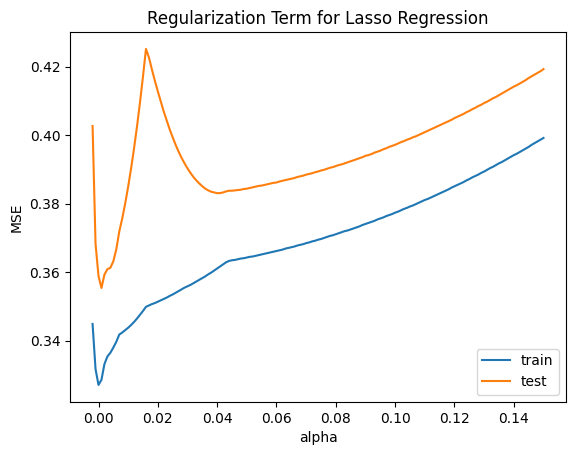

In [89]:
# import sklearn's linear models
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt

display(LassoCV_model.alpha_)

step = -0.001
alphas = np.arange(0.15, -0.003, step)
best_alpha = 1.0
best_mse = 1000
record = []
test= []
for alpha in alphas:
    Lasso_model = Lasso(alpha=alpha, random_state=42)
    Lasso_metrics = train_test("Lasso", Lasso_model, X, y, test_X, test_y)
    # print(Lasso_metrics["test_set"][1])
    if Lasso_metrics["train_set"][0] < best_mse:
        best_mse = Lasso_metrics["train_set"][0]
        best_alpha = alpha
    record.append(Lasso_metrics["train_set"][0])
    test.append(Lasso_metrics["test_set"][0])
    

print(best_alpha, best_mse)


# plot the list with legend
plt.plot(alphas, record, label="train")
plt.plot(alphas, test, label="test")
plt.legend()
# add axis
plt.xlabel("alpha")
plt.ylabel("MSE")
# add title
plt.title("Regularization Term for Lasso Regression")
# set dpi 300
plt.savefig("./img/z/Regularization Term for Lasso Regression.png", dpi=125)


Lasso_model = Lasso(alpha=best_alpha, random_state=42)
Lasso_metrics = train_test("Lasso", Lasso_model, X, y, test_X, test_y)
display("Lasso_metrics: ", Lasso_metrics)

